In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("ticks")
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# STP Framework
## 1. (S)egmentation
- by taste or spending habits
- different reactions to marketing activities
- *demographic* or *geographic*
- *psychographic* or *behavioral*

## 2. (T)argeting
- Evaluating potential profit per segment and choosing a focus
    - segment size, expected growth, competitors

## 3. (P)ositioning
- what products are closest to customer needs?

### Marketing Mix
#### Product
- product features and design (including packaging)
#### Price
- cost, price-changes, discounts
#### Promotion
- TV commercial, flyers
- Two components: How is it advertised? + Related activities to sale and communication
#### Place
- Intensive distribution, Selective distribution, Exclusive distribution

### Questions:
- What customers are there? (KYC)
- Purchase probability
- Brand choice probability
- Purchase quantity


In [2]:
df = pd.read_csv("data/segmentation data.csv", index_col=0)

In [5]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Text(0.5, 1, 'Correlation Heatmap')

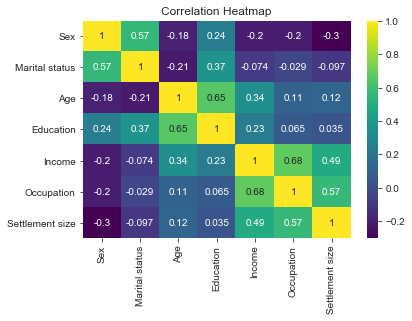

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")

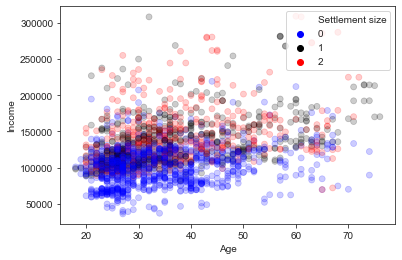

In [86]:
sns.scatterplot(data=df, x="Age", y="Income", hue="Settlement size", palette=["Blue", "Black", "Red"], alpha=0.2, edgecolor=None)

# Standardization

In [3]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [89]:
df_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# Hierarchical Clustering

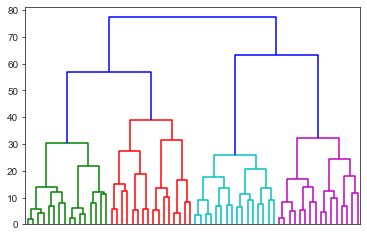

In [100]:
hier_cluster = linkage(df_std, method="ward")
plt.figure()
dendrogram(hier_cluster, show_leaf_counts=False, no_labels=True, truncate_mode="level", p=5)
plt.show()

### Rule of Thumb
... for finding the best number of clusters (i.e. the y at which to draw a horizontal cut):
- Find *the longest* vertical line that **is not** intercepted by any horizontal lines in the whole diagram
=> cut at y=50 

### HC is useful for...
... determining the number of clusters in the data if there is no prior knowledge!


# K-Means Clustering 

In [6]:
wcss = []
for i in range(1,16):
    km = KMeans(n_clusters=i)
    km.fit(df_std)
    wcss.append(km.inertia_)

Text(0.5, 1.0, 'Ellbow Plot')

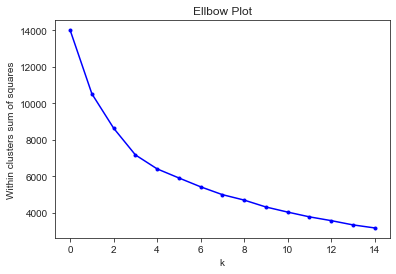

In [19]:
plt.style.use("fast")
plt.plot(wcss, marker=".", color="b")
plt.xlabel("k")
plt.ylabel("Within clusters sum of squares")
plt.title("Ellbow Plot")

## Segment Analysis
= Describing features per cluster found by K-Means

In [22]:
km = KMeans(n_clusters=4)
km.fit(df_std)
df_km = df.copy()
df_km["cluster"] = km.labels_

In [26]:
segment_analysis = df_km.groupby("cluster").mean()
cluster_names = {2: "Well-off", 0:"Fewer-Opportunities", 1: "Standard", 3: "Career-Focused"}

In [39]:
segment_analysis["n_obs"] = df_km.groupby("cluster").count()["Sex"]
segment_analysis["name"] = segment_analysis.index.map(cluster_names)
segment_analysis["pct_of_total"] = segment_analysis["n_obs"]/segment_analysis["n_obs"].sum()

In [40]:
segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,name,pct_of_total
cluster,,,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,Fewer-Opportunities,0.2310
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,Standard,0.3525
2,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,Well-off,0.1315
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,Career-Focused,0.2850


## PCA as K-Means Preprocessing


In [47]:
pca = PCA()
pca.fit(df_std)
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

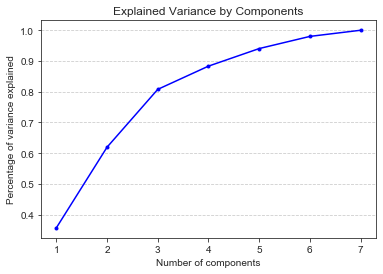

In [69]:
fig, ax = plt.subplots()
ax.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker=".", c="b")
ax.set_xlabel("Number of components")
ax.set_ylabel("Percentage of variance explained")
ax.set_title("Explained Variance by Components")
ax.grid(axis='y', linestyle='--')

In [70]:
pca = PCA(n_components=3)
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
pca_comp = pd.DataFrame(data=pca.components_, columns=df.columns, index=["Component " + str(i) for i in [1,2,3]])
pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Each value is a loading of one variable in a certain component. Component 1 for example might resemple an individuals focus on a carrer (as Age, Education, Income Occupation and Settlement Size seem to be most prominent/correlated)

In [75]:
scores_pca = pca.transform(df_std)

In [76]:
wcss = []
for i in range(1,16):
    km_pca = KMeans(n_clusters=i)
    km_pca.fit(scores_pca)
    wcss.append(km_pca.inertia_)

Text(0.5, 1.0, 'Ellbow Plot')

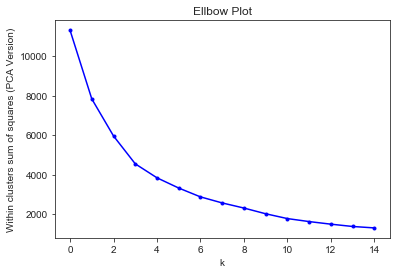

In [78]:
plt.plot(wcss, marker=".", color="b")
plt.xlabel("k")
plt.ylabel("Within clusters sum of squares (PCA Version)")
plt.title("Ellbow Plot")

In [79]:
km_pca = KMeans(n_clusters=4)
km_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [105]:
df_km_pca = df.copy()
df_km_pca = pd.concat([df_km_pca.reset_index(drop=True), pd.DataFrame(scores_pca), pd.Series(km_pca.labels_)], axis=1)
df_km_pca.columns.values[-4:] = "component1 component2 component3 cluster".split()

In [108]:
df_km_pca.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3,cluster
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2


### PCA-Clustered Segments

In [107]:
df_km_pca.groupby("cluster").mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3
cluster,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


### Clusters by PCA Components

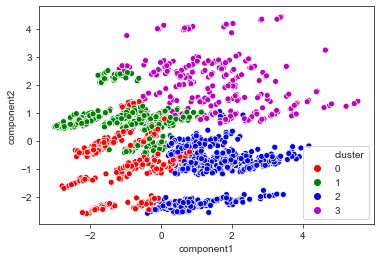

In [112]:
sns.scatterplot(data=df_km_pca, x='component1', y='component2', hue="cluster", palette=["r", "g", "b", "m"])

By using PCA components instead of 2 features like Income and Age, the clusters are now better separated.

In [115]:
import pickle
pickle.dump(scaler, open("./models/scaler.pickle", 'wb'))
pickle.dump(pca, open("./models/pca.pickle", 'wb'))
pickle.dump(km_pca, open("./models/kmeans_pca.pickle", 'wb'))